### A Tale of Life and Death...
In the begining was simplicity. Then, something happened. It's thought to have began about 4.2 Billion years ago, in a mixture of what's called the Promodial Soup. In the chaos of that Soup, small RNA like self-replicating molecules sprung into existance, from just the basic dynamics of Nature. There it was, barely recognizable but nevertheless by definition - LIFE, came into being. This type of life didn't really have the concept of harmful mutations because it relied on them. The 'best' mutations survived and the ones that had fallen behind were left beneath the sands of time, all but forgotten. Darwin called this process Evolution!

For the first 2 Billion years, all life was, at best, a primitive single-celled Organism. It would take Nature's dynamics 2 Billion years of Evolution to create the first Multi-Celluar Organism. It would take another Billion and a half more for complex Multi-Celluar life to form and finally, half a Billion more for mammals to emerge. 

The concept of Maladies is as old as life itself. The definition of Disease might have differed from ages to ages, but the concept of Death has remained the same. Death is when an organism ceases to exist.

The Idea of Death has Frightened humanity for as long as it has existed. Perhaps this is why Socrates's philosophical perspective to Death was hailed as Courageous. Every culture that has ever existed had some answer to Death or perhaps even something after Death. Death was and still is considered to be an inevitable part of Life. That may be so, but what about the process at which we arrive at it? Does Death need to be met with pain and suffering, of illness, or is there an other way?  


               Illness is the night-side of life, a more onerous
               citizenship. Everyone who is born holds dual citizenship,
               in the kingdom of the well and in the kingdom of the 
               sick. Although we all prefer to use only the good passport,
               sooner or later each of us is obliged, at least for a spell, to
               identify ourselves as citizens of that other place.
                                                         -Susan Sontag,
                                                      in Illness as Metaphor
                                                      


I would like to talk about one of those Illnesses that all Living things must face, if it lives long enough that is. Mankind has made soo much progress; We can keep the weakest of us Alive, cure many illness that were considered impossible to even treat, and the average Life span of each of us is only improving every year. All this is good progress. This progress also brings a particular problem, a problem from the depths of Nature of Life. This progress will summon the Emperor of All Maladies - **Cancer**. 

Cancer existed before human progress of course, just not in these numbers. Cancer, for the most part was, is and always will be an illness of the Old and Aging. Before, most creatures never lived long enough to face it. If humans manage to survive their own shortcomings and the threat of Global Warming, they are only going to live longer, and the variability of Cancer is only going to increase.

We have made incredible strides in the field of Cancer in the last Century, but we are still nowhere close to knowing the true Nature of the illness. It isn't from lack of trying though. How can we understand a Maladie that comes in soo many forms and variants? To make things worse, a same kind of Cancer is different in different people and there may be multiple types of Cancer in the same person. Every cancer cell is different and they are very good at mutating and adapting to Treatments; In fact, that is what defines them, Adaptability. They use the same ability of Mutations that made life possible and this is where the problem lies.

An enemy this powerful must be met with all Mankind has, if we ever hopes to match the brutality of Cancer. The newest of those tools that mankind has at its disposal right now is the prowess of Artificial Intelligence and Machine Learing. Of all the kinds of Cancers that are out there, Breast Cancer is the most common among Women, accounting to a total of one in four cancer cases in women, of which the most common type being Invasive Ductal Carcinoma.
 
In this notebook, I will try to detect Invasive Ductal Carcinoma(IDC) from Breast Histopathology Images with relatively good accuracy. It's not much, but it's a start!

### Detecting IDC from Breast Histopathology Images
I will first import all the required libraries; makes things less messier.

In [91]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tqdm as tqdm

from glob import glob
from PIL import Image
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler#, SMOTE 
from imblearn.under_sampling import RandomUnderSampler

# Do not use this, unless ofcourse you have a super fast single thread clock speed
# and lots and lots of time. Maybe there is a more efficient way to do this
# but I will leave it out for now.
#from imblearn.combine import SMOTEENN 

import keras
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Flatten,\
                         Conv2D, MaxPooling2D, GlobalAveragePooling2D


### Exploratory Data Analysis

Why don't we start with the basics : Exploratory Data Analysis!
This is where we see what's what.

In [2]:
# set random seed
#random.seed(21)

# extract image names of all the pathohistology images
image_names = glob('data/**/*.png', recursive=True)
print("\nTotal number of images in the dataset :", len(image_names))
print("\nSample image names from the dataset :", *random.sample(image_names, 5), sep='\n')



Total number of images in the dataset : 277524

Sample image names from the dataset :
images/9227/0/9227_idx5_x1351_y1551_class0.png
images/16531/0/16531_idx5_x901_y401_class0.png
images/9259/0/9259_idx5_x1851_y1101_class0.png
images/10254/0/10254_idx5_x1701_y1801_class0.png
images/12951/1/12951_idx5_x1851_y1851_class1.png


The image name format is as follows : The patient ID, followed by the x and y
coordinates of the image patch taken from the **W**hole **S**lide **I**mages (WSI), and finally the class to which the patch belongs to, where class1 represents a positive patch (IDC+) and class0 represents a negative patch (IDC-).

In [3]:
# Group the images into class0 and class1
class_zero = fnmatch.filter(image_names, '*class0.png')
class_one = fnmatch.filter(image_names, '*class1.png')
# print example image patch name from each class
print("\nPositive and Negative image name example")
print("IDC(-) :", class_zero[0])#, sep='\n')
print("IDC(+) :", class_one[0], '\n')#, sep='\n')


# Chech if all the images have the same dimensions
dimensions = []
max_width = 0; max_height = 0; 
for imgs in tqdm.tqdm(image_names):
    new_image = Image.open(imgs)
    dim = new_image.size
    if dim not in dimensions:
        dimensions.append(dim)
        if max_width < dim[0]:
            max_width = dim[0]
        if max_height < dim[1]:
            max_height = dim[1]       
        
print("\nDifferent image patch dimensions :", dimensions)
print("\nThe total number of different image patch dimensions :", len(dimensions))
print("max_width :", max_width, "  max_height :", max_height, "\n")


  0%|          | 0/277524 [00:00<?, ?it/s]


Positive and Negative image name example
IDC(-) : images/12907/0/12907_idx5_x1851_y1401_class0.png
IDC(+) : images/12907/1/12907_idx5_x2751_y2201_class1.png 



100%|██████████| 277524/277524 [01:02<00:00, 4424.12it/s]


Different image patch dimensions : [(50, 50), (50, 25), (5, 25), (50, 41), (41, 41), (11, 50), (50, 14), (50, 42), (32, 42), (32, 50), (1, 50), (50, 1), (50, 49), (12, 50), (50, 23), (12, 23), (50, 30), (50, 4), (50, 38), (12, 38), (50, 15), (42, 15), (31, 50), (50, 17), (50, 48), (41, 50), (36, 50), (36, 38), (50, 43), (5, 43), (12, 43), (50, 45), (50, 39), (22, 50), (50, 35), (50, 40), (50, 16), (50, 34), (50, 31), (42, 41), (50, 5), (50, 33), (50, 28), (21, 34), (21, 50), (50, 44), (50, 8), (50, 29), (2, 29), (2, 50), (46, 50), (46, 48), (50, 24), (2, 24), (50, 10), (42, 50), (2, 8), (50, 37), (50, 20), (50, 3), (50, 19), (42, 1), (50, 7), (50, 6), (50, 27), (50, 36), (50, 11), (50, 13), (50, 9), (32, 13), (50, 26), (2, 23), (16, 41), (50, 47), (50, 2), (2, 26), (26, 50), (26, 6), (22, 40)]

The total number of different image patch dimensions : 79
max_width : 50   max_height : 50 



As one can see, the max height and max width of the images patches are 50 x 50
and there are 79 different dimensional images in the dataset.
So we are going to resize all the images to size 50x50. 

**Note** : We can see that there are some image patches where the height or width of that image is 2 pixels. Two Pixels! We can be reasonably sure that such image patches are hard to categorise as positive or negative, so we can ignore them if we want. However, I will keep all image patches for now by resizing them to size 50x50.

### Convert image patches to arrays
I am not going to work with the entire dataset as it takes a lot of time to process through it all and I am not even going to talk about the amount of memory it consumes.
I tried to parallelize the for loop to reduce the processing time, but that suprisingly took longer(just made things worst), and I couldn't figure out why. So I'm just going to leave the parallel processing part out for now.

**Note** : The below code takes about 15 minutes to process through 90% of the dataset. You are free to process through it all if you have the required memory. Just change the 'percent' variable to 1. I'm pretty sure that there is a much more efficient way to process through the data set, but I would rather spend my time on the Neural Network Architecture in this notebook.

In [4]:
# Now I will convert the images into a list and then
# to a pandas DataFrame because they are easy to work with.
images = []
labels = []
width = 50; height = 50
# Total percentage of images patches to process through
percent = 0.9
total_images_to_process = int((len(image_names)) * percent)  # 20000 
selected_images = np.random.choice(image_names, size=total_images_to_process)
#print("Total image patches taken for playing :", total_images_to_process)

# We are going to take the above selected percentage of images patches
# at random from the dataset and assign them to X and Y
for img in tqdm.tqdm(selected_images):
    image = cv2.imread(img)
    # resize all images to size 50x50
    images.append(cv2.resize(image, (width, height),\
                             interpolation=cv2.INTER_CUBIC))
    if img in class_zero:
        labels.append(0)
    if img in class_one:
        labels.append(1)
        
    X, Y =  images, labels

    
# Assign the arrays to a pandas dataframe
temp_df = pd.DataFrame({"Images" : X, "Labels" : Y}) 
print("Total image patches taken for playing :", total_images_to_process)
#print(temp_df.describe())
#print(temp_df["Labels"].value_counts())

100%|██████████| 249771/249771 [15:43<00:00, 264.80it/s]

Total image patches taken for playing : 249771


### Plot sample image patches
Now that we have prepped the images into easily workable format, let's
plot a few of them to see how they look!

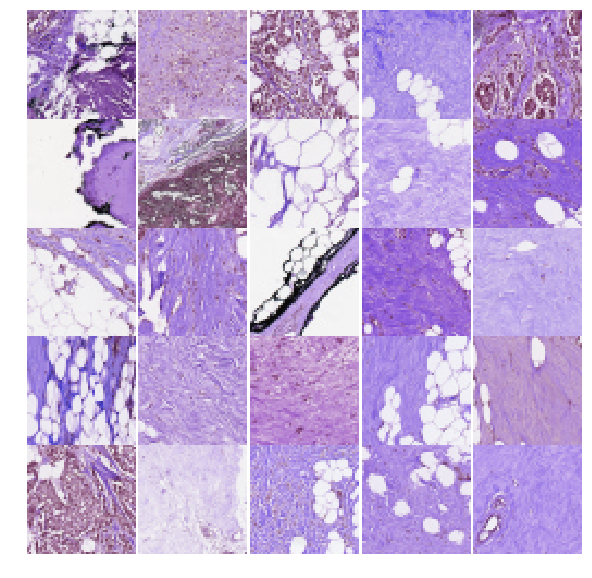

In [5]:
# plot a few random images
def plot_imgs(images):
    random_index = np.random.randint(temp_df["Images"].shape[0], size=25)
    bunch_of_images = temp_df["Images"].iloc[random_index]
    #bunch_of_images = random.sample(X, 25)
    count = 0
    #plt.clf()
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplots_adjust(wspace=0, hspace=0)

    for image in bunch_of_images:
        plt.subplot(5, 5, count+1)
        plt.imshow(image)
        plt.axis('off')
        count += 1
    plt.show()

plot_imgs(temp_df["Images"])
#print(temp_df["Images"].shape)

Umm, not bad.
### Let's plot positive and negative images seperately
This might help us find a pattern between Positive and Negative images and help us in choosing which Data Augmentation Techniques might be the most useful.

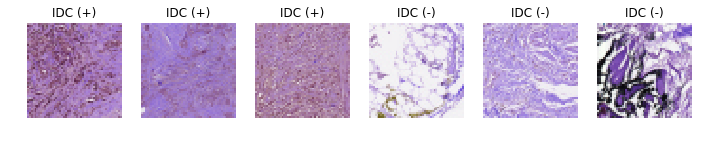

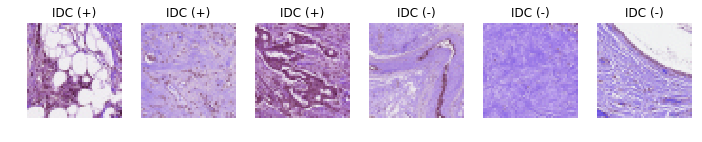

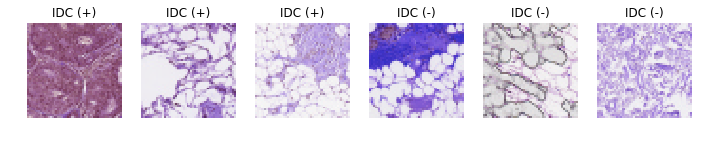

In [6]:
# Sample the positive and negative into different variables
positive_images = temp_df["Images"].loc[temp_df["Labels"] == 1]
negative_images = temp_df["Images"].loc[temp_df["Labels"] == 0]

# to print random positive and negative images
index = np.random.randint(positive_images.shape[0])

sample_positive_images = positive_images.iloc[index:index+9]
sample_negative_images = negative_images.iloc[index:index+9]

count = 0
for row in range(3):
    plt.figure(figsize=(16, 8))
    for col in range(3):
        plt.subplot(1,8,col+1)
        plt.title('IDC (+)')
        plt.imshow(sample_positive_images.iloc[count])
        #print(col+1)
        plt.axis('off')       
        plt.subplot(1,8,col+4)
        plt.title('IDC (-)')
        plt.imshow(sample_negative_images.iloc[count])
        plt.axis('off')
        count += 1
plt.show()

### Histogram
Now let's plot a histogram of the RGB pixal values of an image patch. This will tell us the most prominent pixal values. This can be really useful in Feature Engineering but I think I have more than enough data to not take that route(Feature Engineering) in this 'Project'.

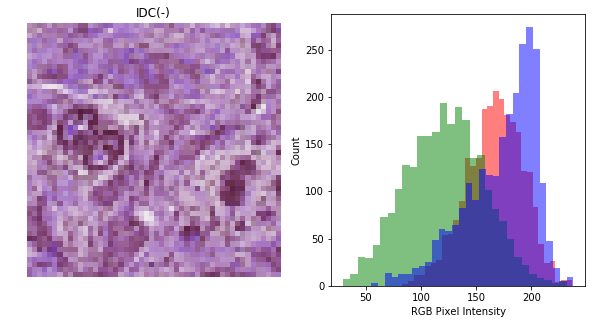

In [7]:
def plot_histogram(img,index):
    """
    Plot histogram of RGB Pixel Intensities
    """
    # to plot the histogram of the image
    plt.figure(figsize=(10,5))
    # to plot the image
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('IDC(+)' if Y[index] else 'IDC(-)')#+str(Y[6]))
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('RGB Pixel Intensity')
    n_bins = 30
    plt.hist(img[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(img[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(img[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);


index = np.random.randint(temp_df["Images"].shape[0])
plot_histogram(temp_df["Images"].iloc[index], index)
plt.show()

The histogram of the image, on average, show blue(purpleish) as its most intense color/channel. This is not surprising as the images are H&E stained, where Hematoxylin(H) is a deep blue-purple color and Eosin(E) is pink.

### Train, Dev/Val and Test Set
Now let's split the data into Training, Development/Validation and Test sets with a ratio of 0.75, 0.15 and 0.1 respectively. This will help us train the model with 75% of the processed data set, use 15% for validation/development and the remaining 10% for testing the competence of our Model.

In [8]:
#print(X[2])

# Normalization
X = np.array(X)
X = X/255
#print(X[2])

X_train, X_temp_dev, Y_train, Y_temp_dev = train_test_split(X, temp_df["Labels"], test_size=0.25)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp_dev, Y_temp_dev, test_size=0.40)

#print(type(X_train))
#print(X_train[0].shape)

### Distribution of data
Let's plot the distribution of data with respect to image classes.

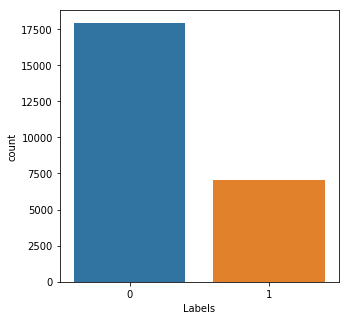

Number of IDC(+) images : 70875
Number of IDC(-) images : 178896
Percentage of IDC(+) images in the dataset : 28.38%
Percentage of IDC(-) images in the dataset : 71.62%


In [9]:
# Plot the distribution of data
plt.figure(figsize=(5,5))
sns.countplot(Y_test)
plt.show()

# print relevant data
positive_images = temp_df["Labels"].value_counts()[1]
negative_images = temp_df["Labels"].value_counts()[0]
print("Number of IDC(+) images :", positive_images)
print("Number of IDC(-) images :", negative_images)
print("Percentage of IDC(+) images in the dataset :", str(round((100*positive_images)/len(temp_df["Labels"]), 2)) + '%')
print("Percentage of IDC(-) images in the dataset :", str(round((100*negative_images)/len(temp_df["Labels"]), 2)) + '%')

As you can see, the amount of positive to negative image patches is 1 to 3. This can become
a problem while training a neural net because of the Class imbalance problem. So we need to perform Sampling of image patches. There are a few ways of doing this and we'll be using UnderSampling and maybe SMOTE...?

### Dealing with the class imbalance problem
I'm going to use two different kinds of Sampling methods to deal with the problem of class imbalance and run the tests on both these samples. 
* Random Majority UnderSampling without Replacement.
* Synthetic Minority OverSampling TEchnique (SMOTE).

Before going on to that, let's first prep the data.

In [10]:
# First I will Flatten the data
X_train_shape = X_train[0].shape[0] * X_train[0].shape[1] * X_train[0].shape[2]
X_dev_shape = X_dev[0].shape[0] * X_dev[0].shape[1] * X_dev[0].shape[2]
X_test_shape =  X_test[0].shape[0] * X_test[0].shape[1] * X_test[0].shape[2]

X_train_flatten, X_dev_flatten, X_test_flatten = [], [], []

for i in range(X_train.shape[0]):  
    X_train_flatten.append(X_train[i].flatten().reshape(X_train_shape))
    if i < X_dev.shape[0]:
        X_dev_flatten.append(X_dev[i].flatten().reshape(X_dev_shape))
    if i < X_test.shape[0]:
        X_test_flatten.append(X_test[i].flatten().reshape(X_test_shape))

X_train_flatten = np.array(X_train_flatten)
X_dev_flatten = np.array(X_dev_flatten)
X_test_flatten = np.array(X_test_flatten)

#X_train.shape
print("X_train_flatten dimensions :", X_train_flatten.shape)
print("X_dev_flatten dimensions   :", X_dev_flatten.shape)
print("X_test_flatten dimensions  :", X_test_flatten.shape)
#print(X_test_flatten[0])

X_train_flatten dimensions : (187328, 7500)
X_dev_flatten dimensions   : (37465, 7500)
X_test_flatten dimensions  : (24978, 7500)


### Random minority UnderSampling without replacement
The ratio of positive to negative image patchs is about 1:3. So I will use UnderSampling, which will reduce the number of negative examples to about 33% of its initial size, hence matching the positive examples and therefore reducing the total datasize by half. This should be fine because even this halved Dataset is big enough to have an effect on our Neural Nets.

I could have used Random OverSampling, which would increase the sample of the minority class by Sampling the minority class with replacement to match the size of the majority class. I didn't do that here because the Data we have is large, and also, I can barely fit the present data into my RAM, let alone something twice as much.

100%|██████████| 106384/106384 [00:00<00:00, 901438.88it/s]


X_train_rus Dimensions : (106384, 50, 50, 3)
X_dev_rus Dimensions   : (21222, 50, 50, 3)
X_test_rus Dimensions  : (14144, 50, 50, 3)


<Figure size 720x720 with 0 Axes>

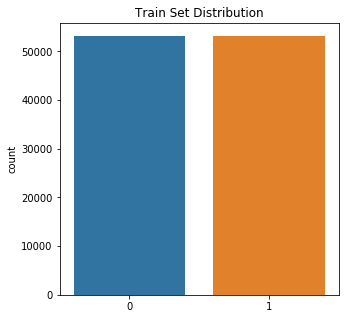

In [11]:
def random_sample(sample_method):
    sm = sample_method #RandomUnderSampler(ratio='auto', replacement=False)
    X_train_sm, Y_train_sm = sm.fit_sample(X_train_flatten, Y_train)
    X_dev_sm, Y_dev_sm = sm.fit_sample(X_dev_flatten, Y_dev)
    X_test_sm, Y_test_sm = sm.fit_sample(X_test_flatten, Y_test)

    for i in tqdm.tqdm(range(len(X_train_sm))):
        height, width, channels = 50, 50, 3
        X_train_sm_reshaped = X_train_sm.reshape(len(X_train_sm), height, width, channels)
        if i < len(X_dev_sm):
            X_dev_sm_reshaped = X_dev_sm.reshape(len(X_dev_sm), height, width, channels)
        if i < len(X_test_sm):
            X_test_sm_reshaped = X_test_sm.reshape(len(X_test_sm), height, width, channels)

    return X_train_sm_reshaped, Y_train_sm, X_dev_sm_reshaped,\
                Y_dev_sm, X_test_sm_reshaped, Y_test_sm
    

def make_hot_vector(Y_train, Y_dev, Y_test):
    """
      Encode the 'Labels' into the hot vector
    """
    Y_train_hot = to_categorical(Y_train, num_classes = 2)
    Y_dev_hot = to_categorical(Y_dev, num_classes = 2)
    Y_test_hot = to_categorical(Y_test, num_classes = 2)
    return Y_train_hot, Y_dev_hot, Y_test_hot


X_train_rus, Y_train_rus, X_dev_rus,\
Y_dev_rus, X_test_rus, Y_test_rus = random_sample(RandomUnderSampler(ratio='auto'))#, replacement=False))
 
    
Y_train_rus_hot, Y_dev_rus_hot, Y_test_rus_hot =\
       make_hot_vector(Y_train_rus, Y_dev_rus, Y_test_rus)

#plot_imgs(X_train_sm_reshaped)
print("X_train_rus Dimensions :", X_train_rus.shape)
print("X_dev_rus Dimensions   :", X_dev_rus.shape)
print("X_test_rus Dimensions  :", X_test_rus.shape)
plt.clf()
plt.figure(figsize=(5,5))
plt.title('Train Set Distribution')
sns.countplot(Y_train_rus)
plt.show()


### Synthetic Minority Over-sampling TEchnique (SMOTE)
Here, SMOTE increases the minority positive image patches to match the majority negative image patches by creating new synthetic data using k-Nearest Neighbors.
Just as there is no free lunch, this approach comes with its own costs. The problem with synthetic data is, it introduces a bias into the model. Let's see how that works out!


In [12]:
#X_train_smote, Y_train_smote, X_dev_smote,\
#Y_dev_smote, X_test_smote, Y_test_smote = random_sample(SMOTE(sampling_strategy='auto'))

# encode hot vector
#Y_train_smote_hot, Y_dev_smote_hot, Y_test_smote_hot =\
#       make_hot_vector(Y_train_smote, Y_dev_smote, Y_test_smote)

#plot_imgs(X_train_sm_reshaped)
#print("X_train_smote dimensions :", X_train_smote.shape)
#print("X_dev_smote dimensions   :", X_dev_smote.shape)
#print("X_test_smote dimensions  :", X_test_smote.shape)
#plt.figure(figsize=(5,5))
#sns.countplot(Y_train_smote)
#plt.show()

Damn it!!! SMOTE takes a long time to process to create new synthetic images, and on top of that, the Memory it consumes is hella lot. I am afraid I will have to let SMOTE go. 
SMOTE, at the fundamental level, gives a trade off between precision vs. recall. By using SMOTE, we can increase recall at the cost of precision, which can be arrived through tuning other parameters anyway, so all is not lost. The positive to negative data is 1:3, which is still OK compared to 1:10 or worst, 1:100 ratioed data sets that are out there. When a dataset is that skewed, SMOTE might be a life saver, literally, because many Medical Image dataset are that skewed. We could also try Feature Engineering for those skewed datasets but that's an entirely different story. I digress, but the point is, for the data set we have right now, SMOTE isn't the silver bullet we should be looking at.

### Helper Functions
I will define some helper functions to help me plot the Confusion Matrix and the Learning curve.

In [89]:
def plot_confusion_matrix(X_data, Y_data_hot, title):
    
    Y_pred_one_hot = model.predict(X_data)
    Y_pred_labels = np.argmax(Y_pred_one_hot, axis=1)
    Y_true_labels = np.argmax(Y_data_hot, axis=1)
    confusion_matrix = metrics.confusion_matrix(y_true=Y_true_labels, y_pred=Y_pred_labels)
       
    cm_df = pd.DataFrame(confusion_matrix, index=["IDC(-)", "IDC(+)"],\
                                         columns=["IDC(-)", "IDC(+)"])
    cm_plot = plt.figure(figsize=(5, 5))
    heatmap = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Greens") # Yippee, Green!!!
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=12)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cm_plot



def plot_learning_curve(training):
    plt.clf()
    plt.figure(figsize=(10, 10))
    
    # plot the entire model history for the accuracy
    plt.subplot(1,2,1)
    plt.plot(training.history['acc'])
    plt.plot(training.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy_curve.png')

    # plot the entire model history for the losses
    plt.subplot(1,2,2)
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_curve.png')
    plt.show()
    

### Convolutional Neural Network
We finally arrive at the the good stuff, CNN!
I will first describe the Architecture and details of my Convolutional Neural Network.

#### Block   
Here, a 'Block' is a series of Convolution layers. It is defined as follows:

Conv_Block : Convolution_3X3 (32 layers)  --> Convolution_3X3 (64 layers) --> Convolution_3X3 (128 layers)  

#### Network Architecture
Conv_Block(padding=same)  --> Convolution_1x1 (32 layers) -->   
Conv_Block(padding=valid)&nbsp;&nbsp;--> Convolution_1x1 (32 layers) --> MaxPooling2D_2X2 -->  
Conv_Block(padding=valid)&nbsp;&nbsp;--> Convolution_1x1 (32 layers) --> MaxPooling2D_2X2 -->  
Conv_Block(padding=valid)&nbsp;&nbsp;--> Convolution_1x1 (64 layers) --> GlobalAveragePooling2D -->  
Dense(2, activation=sigmoid)

#### Activation Function
Other than for the final dense layer, all layers/kernels are 'relu' activated. 'relu' is sweet, simple and clean, so we will leave it at that. I will be using the 'sigmoid' activation function for the final output layer though, because you know, probability and stuff.

#### Convolution Kernel Size  
I will only use 3X3 kernels because one can get any receptive field (such as 5x5 or 7x7) by just staking up multiple 3x3s. The number of parameters used to calculate a receptive field is lower for multiple 3x3 than that for higher sized Kernels i.e. The number of trainable parameters for three 3x3s, to cover a receptive field of 7x7, is 3\*3\*3 = 27, where as the number of trainable parameters for kernel sized 7\*7 = 49. And also, Nvidia GPUs are Optimized to work on 3x3 kernel sizes so it would be a shame not to.

#### DropOut and Dense Layers
I won't be using DropOut. The reason for this is because, DropOuts are amazing at regularization and making sure that no single neuron is too important and that different neuron learn from the same data 'differently' and hence learning the 'sematics' of the data. However, the cost of this is, during testing time, there can be no dropout, so we divide the data by the dropout factor to normalize the data, and hence loose a lot of valuable information. This can not be tolerated.

#### Dense Layers
I won't be using Dense Layers either, except for the final output, because they loose the spatial information by going from 2D space to 1D space. They also add a lot of parameters to train without giving much increase in performance.  

I tried BatchNormalization but it didn't really help so I will leave that out too.

In [108]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='valid',activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))


model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='valid', activation='relu'))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='sigmoid'))


In [109]:
# print out model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 50, 50, 32)        4128      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 44, 44, 128)       73856     
__________

In [36]:
# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.00033), #67),  #0.00001), #'AdaDelta',
              metrics=['accuracy'])#, precision, recall, f1_score])

### Data Augmentation
I won't be using any Data Augmentation techniques here because they make training longer (by about twice as much) without, in this case, having much improvement in the Train/Val Accuracy. The dataset we have is large enough, even after UnderSampling, to give us reasonably Good results. I did try different combinations of Data Augmentation Techniques, but from little to no avail in increase of accuracy.

In [37]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False, #True,
    featurewise_std_normalization=False) #, #True,
    #zoom_range=0.2,
    #rotation_range=25,
    #horizontal_flip=True,
    #vertical_flip=True,
    #width_shift_range=0.1,
    #height_shift_range=0.1)

### Monitors and CheckPoints
Save checkpoints of the model to an output file.

In [40]:
# For early stopping of model
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# To create checkpoints after each improvement of validation loss and save it in a .h5 file
model_checkpoint = ModelCheckpoint('best-mdl_cp_23.h5', monitor='val_loss',\
                                    verbose=1, mode='auto', save_best_only=False)

### Train the CNN
Let's train the CNN and see how it goes!

In [41]:
batch_size = 256
num_classes = 2
epochs = 50 #180 #200

training = model.fit_generator(datagen.flow(X_train_rus,\
                                            Y_train_rus_hot,\
                                            batch_size=batch_size),\
                                            steps_per_epoch=(len(X_train_rus)/batch_size),\
                                            epochs=epochs,\
                                            validation_data=(X_dev_rus, Y_dev_rus_hot),\
                                            verbose=1,\
                                            callbacks=[early_stopping_monitor, model_checkpoint])#, history])


Epoch 1/50
416/415 [==============================] - 65s 157ms/step - loss: 0.4937 - acc: 0.7643 - val_loss: 0.4385 - val_acc: 0.8088

Epoch 00001: saving model to best-mdl_cp_23.h5
Epoch 2/50
416/415 [==============================] - 64s 154ms/step - loss: 0.4265 - acc: 0.8112 - val_loss: 0.3964 - val_acc: 0.8298

Epoch 00002: saving model to best-mdl_cp_23.h5
Epoch 3/50
416/415 [==============================] - 64s 154ms/step - loss: 0.3999 - acc: 0.8255 - val_loss: 0.3845 - val_acc: 0.8341

Epoch 00003: saving model to best-mdl_cp_23.h5
Epoch 4/50
416/415 [==============================] - 64s 154ms/step - loss: 0.3770 - acc: 0.8390 - val_loss: 0.3669 - val_acc: 0.8448

Epoch 00004: saving model to best-mdl_cp_23.h5
Epoch 5/50
416/415 [==============================] - 64s 155ms/step - loss: 0.3599 - acc: 0.8490 - val_loss: 0.3391 - val_acc: 0.8594

Epoch 00005: saving model to best-mdl_cp_23.h5
Epoch 6/50
416/415 [==============================] - 64s 154ms/step - loss: 0.3507 -


Epoch 00045: saving model to best-mdl_cp_23.h5
Epoch 46/50
416/415 [==============================] - 64s 154ms/step - loss: 0.1145 - acc: 0.9561 - val_loss: 0.3640 - val_acc: 0.8933

Epoch 00046: saving model to best-mdl_cp_23.h5
Epoch 47/50
416/415 [==============================] - 64s 154ms/step - loss: 0.1024 - acc: 0.9618 - val_loss: 0.3825 - val_acc: 0.8922

Epoch 00047: saving model to best-mdl_cp_23.h5
Epoch 48/50
416/415 [==============================] - 64s 154ms/step - loss: 0.1015 - acc: 0.9623 - val_loss: 0.3777 - val_acc: 0.8916

Epoch 00048: saving model to best-mdl_cp_23.h5
Epoch 49/50
416/415 [==============================] - 64s 154ms/step - loss: 0.0921 - acc: 0.9662 - val_loss: 0.4391 - val_acc: 0.8959

Epoch 00049: saving model to best-mdl_cp_23.h5
Epoch 50/50
416/415 [==============================] - 64s 154ms/step - loss: 0.0887 - acc: 0.9669 - val_loss: 0.4052 - val_acc: 0.8952

Epoch 00050: saving model to best-mdl_cp_23.h5


The accuracy of the Training set is about 0.965   
The accuracy of the Validation set is about 0.89
 
I am, on purpose, over-fitting the Training set because even thought the loss of the validation set is only increasing after about 30 epochs, so is its accuracy! Of course, this means that the probability/confidence of each prediction in the validation set, on average, is decreasing. This isn't necessarily bad as long as the model gives us the same accuracy for unseen data.

So let's see if the model really works or I just got lucky with the validation set; by testing the model on the Test set.

In [51]:
# Test set score
score = model.evaluate(X_test_rus, Y_test_rus_hot, verbose=1)
print("Test set loss     : ", score[0])
print("Test set accuracy : ", score[1])
#model.get_weights()

14144/14144 [==============================] - 3s 246us/step
Test set loss     :  0.4280760147065194
Test set accuracy :  0.8903775452488688


Yippee!!! Even after that huge Over-fit in the Training set, both the validaion and the test sets are within the same accuracy range of 89% plus/minus 1%. Not too shabby.


### Other Metrics
When it comes to Medical data, accuracy is not as important as precision and recall pairs. They show us how good our model is at getting the positive or negative image patches right.  So let's investigate some of these metrics.

In [87]:
#model = load_model('best-mdl_cp_23.h5')

def scores(X_data, Y_data_hot):
    Y_pred_one_hot = model.predict(X_data)
    Y_pred_labels = np.argmax(Y_pred_one_hot, axis=1)
    Y_true_labels = np.argmax(Y_data_hot, axis=1)

    true_positives = np.sum(np.round(np.clip(Y_true_labels * Y_pred_labels, 0, 1)))
    predicted_positives = np.sum(np.round(np.clip(Y_pred_labels, 0, 1)))
    possible_positives = np.sum(np.round(np.clip(Y_true_labels, 0, 1)))

    epsilon = 1e-07
    precision = true_positives / (predicted_positives + epsilon)
    recall = true_positives / (possible_positives + epsilon)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1_score



# assign all the metrics to 'data' variable
data = [scores(X_train_rus, Y_train_rus_hot), scores(X_dev_rus, Y_dev_rus_hot), \
        scores(X_test_rus, Y_test_rus_hot)]

# Create the pandas DataFrame 
all_metrics = pd.DataFrame(data, columns = ['Precision', 'Recall', 'F1_score'],\
                       index = ['Train', 'Validation', 'Test' ]) 

all_metrics['Accuracy'] = [training.history['acc'][-1],\
                       training.history['val_acc'][-1], score[1]]

all_metrics

,Precision,Recall,F1_score,Accuracy
Train,0.975882,0.978249,0.977064,0.966903
Validation,0.889126,0.903119,0.896068,0.895203
Test,0.882076,0.901160,0.891516,0.890378


The precision-recall pairs of both the Validation set and Test set are almost the same. This shows that even though the train set is over fit, the acc, precision, recall and the f1_score for previously unseen data are all in the same range, and therefore showing that our model is robust!
### Precision and Recall
What's more intriguing in the above trained model is that Recall score is greater than that of Precision on both val and test set. This is no mistake. I trained the model to have an higher recall compared to precision because this is one of the important problems in the field of Laboratory Diagnosis. To see that, let's see what Recall-Precision pairs really are :  
+ (1 - Recall) gives the probabiliy that an image is positive(the patient has an illness) but the model predicts it as negative.   

+ (1 - Precision) on the other hand gives us the probabiliy that an image is negative(the patient does not have an illness) but the model predicts it as positive.  

Therefore, better the recall score, better the chances that our model predicts that a person with illness has an illness, correctly. So why not just keep increasing the recall score. This is where the Recall-Precision pair comes into play. If you increase the Recall score, you are predicting that more images are positive, even the negative ones, and hence decreasing the precision score. Therefore, increasing the recall decreases the precision.

I would preferable want recall to increase as much as possible, even if it costs a little of precision score. Of course, a trivial solution to this is to categorise all images as positive, giving a recall of 100% but also giving a precision of 50%(for balanced data) which... is no better than a coin flip, which basically makes out model worthless. 

I have optimized the model just so that the recall score is greater than precision, but not so much as to affect precision significantly. I tried to increase recall by a percent or two more and it cost me 5-8 percent of precision score, so that's not worth it.


#### **Important Note** 
I would like to confess something. The way I got this... 'preferred' recall-precision pair was not throught exact Science, but kinda sorta through trial and error. Even now, when the keras random initializer is angry, It can give you very different recall-precision pairs, but atleast the accuracy seems to remain the same (within a percent or two of course) so I atleast have that going for me.  
So if you get this 'un-preferred' recall-precision pairs, just do what any great Machine Learning Engineer does, smack the model on the head and run it for 10-20 epochs more until you get the desired results :) If this doesn't work either, re-run the entire Notebook from scratch. Maybe it wasn't the keras random initializer, but the image patches that were randomly choosen that's messing with your recall-precision score. I have found that more often than not, you get the prefered recall-precision score(where recall>precision), so it's not all bad.

### Confusion Matrix
Confusion matrices are a great way to visualize the error in data reporting. This is a great way to visualize False Positives and False Negatives, Oh and also True Positives and True Negatives.

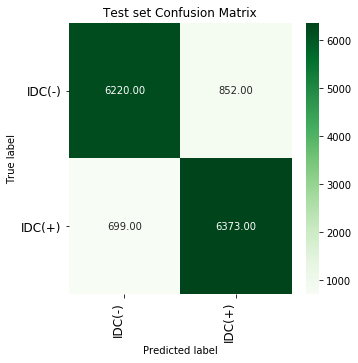

In [92]:
# Test set confusion matrix
plot_confusion_matrix(X_test_rus, Y_test_rus_hot, title="Test set Confusion Matrix")
#plot_confusion_matrix(X_train_rus, Y_train_rus_hot, title="Train set Confusion Matrix")

### Plot the Learning Curve
Let's plot the learing curve to see what's going on with the model accuracy and loss.

<Figure size 720x720 with 0 Axes>

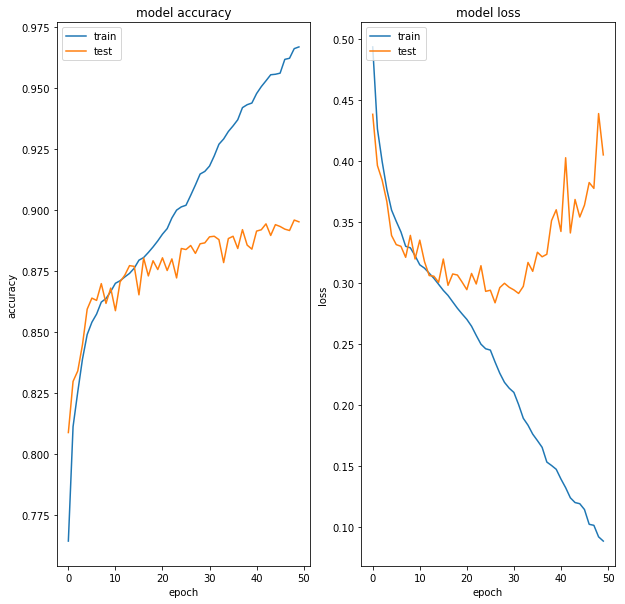

In [94]:
plot_learning_curve(training)

We can see that the validation loss of the model does in fact increase after about 25-30 epochs, but the accuracy remains stable. This means that the model is *leaning* towards categorising most of the data as positive. This also means that the negatively predictied images will have relatively less confidence, but such is the cost to increase Recall.

I can also train a model in such a way that the loss of validation set doesn't increase. Such a models accuracy and loss curves might look like the following:
![alt text](images/loss_acc_curve_150epochs.png)


The above model was run with a slightly different CNN architecture(no 'same' padding layers) with a learning rate of 0.00001 for 150 epochs. This model gave a val-acc of about 85% plus/minus 1-2% depending on it's mood.

In the model such as the above, both Recall and Precision scores will almost be the same. The model doesn't seem to overfit to the data either!  
All this is good, but this is not what I was look for. This is my opinion so take it with a grain of salt, but False Negatives are a sin and should be minimized even if it means a 2-3 percent increase in False Positive scores. I would rather get my test as positive when I am disease free, and have another test to verify it, than have an illness and get the test back as Negative. This is not to say that the trauma of getting a False Positive is any less painful, but if these are the recall/precision ratios, False Positives are better than False Negatives, and we need to find an optimal balance that we are OK with.

### Drawbacks of my Model
I feel like I have been babbling about Recall-Precision pairs(a thing I made up by the way), and good/bad of False/True Positives/Negatives. It's said that data/image explains more than a thousand words, so why don't I show you the precision-recall of the entire *Unbalanced* Data set, with its corresponding Confusion Matrix.


Full Data precision : 0.8083773243914867
Full Data recall    : 0.9593086419739552
Full Data f1_score  : 0.8773994567134752


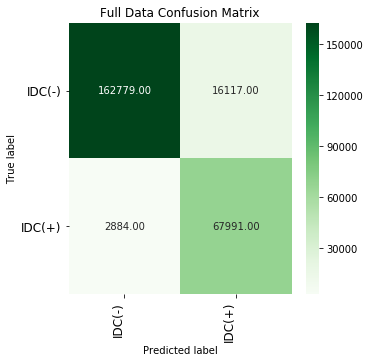

In [103]:
Y_allData_hot = to_categorical(np.array(temp_df["Labels"]), num_classes = 2)
#X_allData = X                   
# This might take a minute or two. 
# It has to process through the entire length of data set multiple times after all.
precision, recall, f1_score = scores(X, Y_allData_hot)

#print(precision, recall, f1_score)
print("Full Data precision :", precision)
print("Full Data recall    :", recall)
print("Full Data f1_score  :", f1_score)

plot_confusion_matrix(X, Y_allData_hot, title="Full Data Confusion Matrix")

There it is, in all it's glory! The precision of the entire *imbalanced* data set is about 81%. I know, I know, this is not good. But, fweet... fweet.....(whistling at the data)  loook at that Recall score. Close to 96%!!! This shows that if the model predicts that the patient/person doesn't have the illness, he/she can be pretty sure that he/she doesn't. I suppose I could experiment a little bit more on that low precision score, but I will leave it for now.

### A few words
This project had a lot of data(relatively lot) and as you can see, the results are reasonably good. I don't really know what the State of the Art scores for this data set is, but this is what I got and I am OK with it. Oh what the hell, considering that this was my first "from the scratch project", I am kinda proud of myself :)  
I don't know if this was reasonably good or outright terrible. In case it was the former and I get recruited, in the future I would love to work on projects that have almost no data and help achieve comparable or better results. Then again, I would be fine with any project really! Thank you :)

### Do we have a chance...
I...Ummm... I would like to say something unconventional, an Unpopular Opinion. Something people don't like to hear, especially not the Researchers.  
Cancer cannot be defeated. Not because we are not smart enough, but because it is not a problem of Biology but that of Physics. Entropy always, ALWAYS increase. But there is a loop hole to this statement. Yes, it's true that the overall Entropy of the universe increased but Entropy of a system, like that of a human body, can decrease, of course at the cost of increasing the Entropy of the universe. We could do that, and I am pretty confident that the universe wouldn't mind. After all, as Carl Sagan put it, 'We are a way for the cosmos to know itself'.   

  

                It is in vain to speak of cures, or think of remedies, until
                such time as we have considered of the causes... cures
                must be imperfect, lame, and to no purpose, wherein the
                causes have not first been searched.
                                                      - Robert Burton    
                                                 The Anotomy of Melancholy, 1893


We have come a long way from when the author spoke of these words, but our methods have barely changed.  
Perhaps it's true that Cancer is inevitable and, maybe, cannot be defeated; but by doing what Humans do best, we could one day learn to *Nurture* and *Control* it. Why fight it if we could **Understand** it and make it our ally. Who know, one day, someday, unlocking the secrets to Cancer might help Humanity reach to the stars...  
So let us dare to Conquer The Emperor of All Maladies.
##### Can we though... I wonder.....